# **Previsão de Estoque Inteligente – Notebook**

Descrição:
Este notebook tem como objetivo desenvolver um modelo de previsão de estoque utilizando técnicas de Machine Learning. Serão analisados dados de produtos, preços, promoções e histórico de estoque para prever a quantidade necessária em períodos futuros.

# **Objetivos do projeto:**

Explorar e analisar o dataset de estoque, preços e promoções.

Pré-processar os dados e preparar features para o modelo.

Treinar um modelo de regressão usando LightGBM, avaliando sua performance com métricas como RMSE, MAE e R².

Visualizar previsões, resíduos e importância das features.

Gerar insights para decisões de negócio, como reposição de estoque, promoções e planejamento de compras.

Ferramentas e bibliotecas utilizadas:

Python: Pandas, NumPy, Matplotlib, Seaborn

Scikit-learn: pré-processamento e métricas

LightGBM: modelo de regressão baseado em Gradient Boosting

Google Colab: ambiente de execução

Resumo do fluxo do notebook:

Análise exploratória de dados (EDA)

Pré-processamento e encoding de variáveis categóricas

Treinamento e validação do modelo

Avaliação de performance e análise de erros

Visualização de resultados e insights acionáveis

# **Nota sobre a escolha do ambiente**

Este projeto foi desenvolvido no Google Colab devido a uma limitação técnica: o AWS SageMaker Canvas estava desativado e não foi possível executar o treinamento diretamente na plataforma.

O Colab foi a alternativa ideal porque:

Execução imediata: Permite rodar todo o fluxo de Machine Learning sem depender de serviços externos.

Controle total do código: Podemos implementar, ajustar e documentar cada etapa do pré-processamento, treinamento e avaliação do modelo.

Integração com Google Drive: Facilita carregar datasets e salvar resultados, mantendo todo o projeto organizado.

Reprodutibilidade e portfólio: Todo o processo fica registrado em células de código e markdown, tornando o notebook didático e pronto para apresentação.

Assim, apesar de originalmente previsto para SageMaker Canvas, o projeto manteve toda a funcionalidade e aprendizado esperado, demonstrando de forma clara o pipeline de previsão de estoque inteligente.

In [ ]:
# Instalar pacotes necessários
!pip install pandas scikit-learn lightgbm catboost --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
# 1️⃣ Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from google.colab import files
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Carregar dataset
df = pd.read_csv('/content/drive/MyDrive/cursos/dataset-1000-com-preco-promocional-e-renovacao-estoque.csv')

# 3️⃣ Definir variável alvo e features
X = df.drop('QUANTIDADE_ESTOQUE', axis=1)
y = df['QUANTIDADE_ESTOQUE']

# 4️⃣ Transformar categóricas em dummies
X = pd.get_dummies(X)

# 5️⃣ Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ Preparar datasets LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# 7️⃣ Definir parâmetros
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1
}

# 8️⃣ Treinar modelo usando callback para early stopping
model = lgb.train(
    params,
    train_data,
    num_boost_round=500,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=30)]
)

# 9️⃣ Avaliar performance
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE do modelo: {rmse:.2f}')

# 🔟 Salvar previsões
predictions = pd.DataFrame({'real': y_test, 'previsto': y_pred})
predictions.to_csv('/content/previsoes.csv', index=False)

# 💾 Baixar previsões
files.download('/content/previsoes.csv')


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[7]	valid_0's rmse: 30.4144
RMSE do modelo: 30.41


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Configurações visuais
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

# Carregar dataset
df = pd.read_csv('/content/drive/MyDrive/cursos/dataset-1000-com-preco-promocional-e-renovacao-estoque.csv')

# Mostrar as primeiras linhas
df.head()

,ID_PRODUTO,DATA_EVENTO,PRECO,FLAG_PROMOCAO,QUANTIDADE_ESTOQUE
0,1000,2023-12-31,138.43,1,100
1,1001,2023-12-31,75.08,0,100
2,1002,2023-12-31,58.84,0,100
3,1003,2023-12-31,61.96,0,100
4,1004,2023-12-31,20.34,0,100


In [ ]:
# Dimensão do dataset
print("Número de linhas e colunas:", df.shape)

# Tipos de dados e nulos
print("\nInformações gerais:")
df.info()

# Checar nulos
print("\nValores nulos por coluna:")
print(df.isna().sum())

# Estatísticas descritivas
print("\nResumo estatístico:")
df.describe()


Número de linhas e colunas: (1000, 5)

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_PRODUTO          1000 non-null   int64  
 1   DATA_EVENTO         1000 non-null   object 
 2   PRECO               1000 non-null   float64
 3   FLAG_PROMOCAO       1000 non-null   int64  
 4   QUANTIDADE_ESTOQUE  1000 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB

Valores nulos por coluna:
ID_PRODUTO            0
DATA_EVENTO           0
PRECO                 0
FLAG_PROMOCAO         0
QUANTIDADE_ESTOQUE    0
dtype: int64

Resumo estatístico:


,ID_PRODUTO,PRECO,FLAG_PROMOCAO,QUANTIDADE_ESTOQUE
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1012.000000,78.638270,0.206000,55.727000
std,7.214711,53.409199,0.404633,30.586599
min,1000.000000,18.310000,0.000000,1.000000
25%,1006.000000,29.650000,0.000000,30.000000
50%,1012.000000,66.310000,0.000000,58.000000
75%,1018.000000,129.130000,0.000000,83.000000
max,1024.000000,187.040000,1.000000,100.000000


In [ ]:
# Dimensão do dataset
print("Número de linhas e colunas:", df.shape)

# Tipos de dados e nulos
print("\nInformações gerais:")
df.info()

# Checar nulos
print("\nValores nulos por coluna:")
print(df.isna().sum())

# Estatísticas descritivas
print("\nResumo estatístico:")
df.describe()


Número de linhas e colunas: (1000, 5)

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_PRODUTO          1000 non-null   int64  
 1   DATA_EVENTO         1000 non-null   object 
 2   PRECO               1000 non-null   float64
 3   FLAG_PROMOCAO       1000 non-null   int64  
 4   QUANTIDADE_ESTOQUE  1000 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB

Valores nulos por coluna:
ID_PRODUTO            0
DATA_EVENTO           0
PRECO                 0
FLAG_PROMOCAO         0
QUANTIDADE_ESTOQUE    0
dtype: int64

Resumo estatístico:


,ID_PRODUTO,PRECO,FLAG_PROMOCAO,QUANTIDADE_ESTOQUE
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1012.000000,78.638270,0.206000,55.727000
std,7.214711,53.409199,0.404633,30.586599
min,1000.000000,18.310000,0.000000,1.000000
25%,1006.000000,29.650000,0.000000,30.000000
50%,1012.000000,66.310000,0.000000,58.000000
75%,1018.000000,129.130000,0.000000,83.000000
max,1024.000000,187.040000,1.000000,100.000000


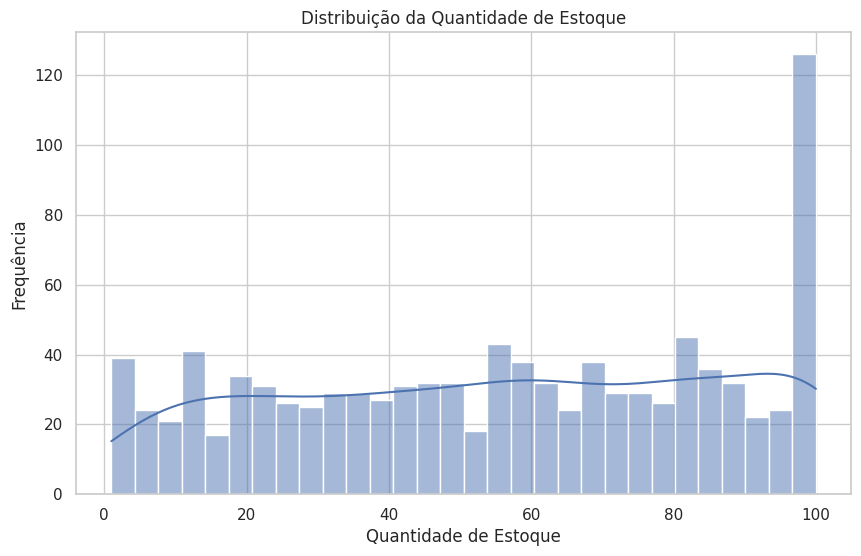

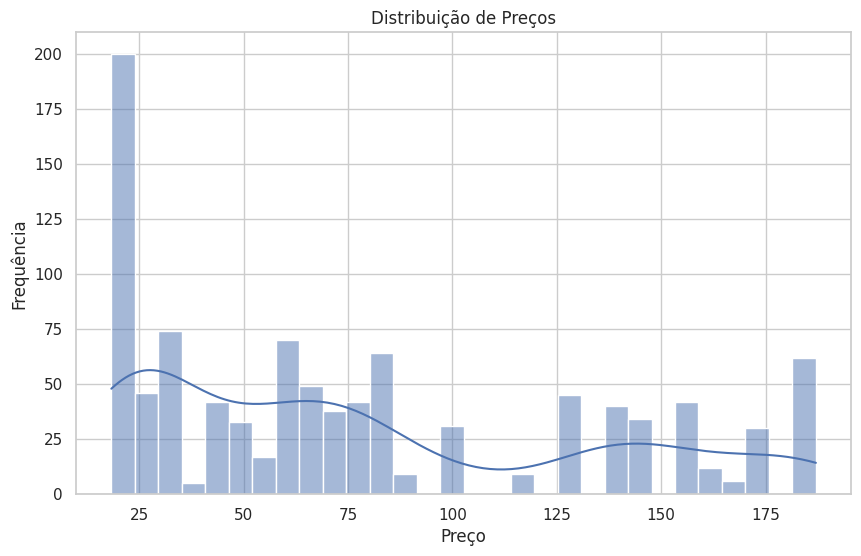

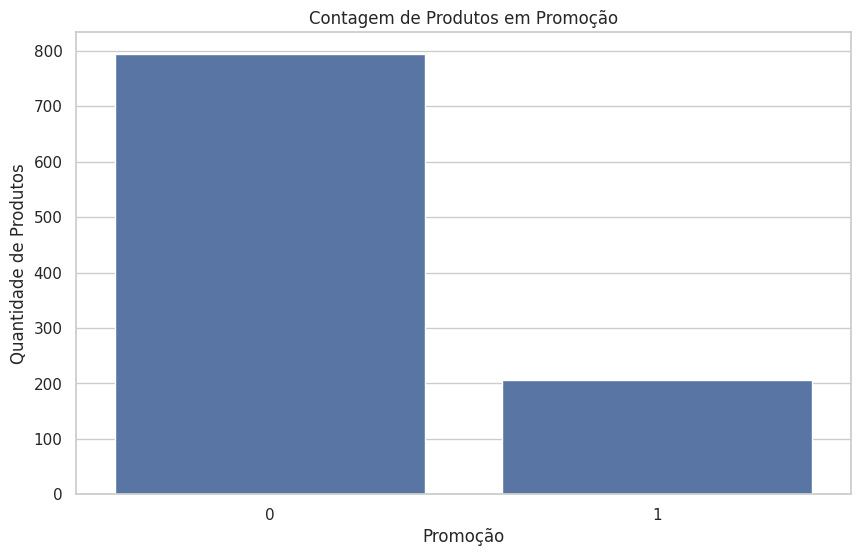

In [ ]:
# Histograma de quantidade de estoque
sns.histplot(df['QUANTIDADE_ESTOQUE'], bins=30, kde=True)
plt.title('Distribuição da Quantidade de Estoque')
plt.xlabel('Quantidade de Estoque')
plt.ylabel('Frequência')
plt.show()

# Histograma de preços
sns.histplot(df['PRECO'], bins=30, kde=True)
plt.title('Distribuição de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# Contagem de produtos em promoção
sns.countplot(x='FLAG_PROMOCAO', data=df)
plt.title('Contagem de Produtos em Promoção')
plt.xlabel('Promoção')
plt.ylabel('Quantidade de Produtos')
plt.show()


In [ ]:
# Variável alvo
target = 'QUANTIDADE_ESTOQUE'

# Features (todas menos a target)
X = df.drop(target, axis=1)
y = df[target]

# Transformar variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)  # drop_first evita multicolinearidade

print("Features após one-hot encoding:", X.columns.tolist())
print("Dimensão das features:", X.shape)


Features após one-hot encoding: ['ID_PRODUTO', 'PRECO', 'FLAG_PROMOCAO', 'DATA_EVENTO_2024-01-01', 'DATA_EVENTO_2024-01-02', 'DATA_EVENTO_2024-01-03', 'DATA_EVENTO_2024-01-04', 'DATA_EVENTO_2024-01-05', 'DATA_EVENTO_2024-01-06', 'DATA_EVENTO_2024-01-07', 'DATA_EVENTO_2024-01-08', 'DATA_EVENTO_2024-01-09', 'DATA_EVENTO_2024-01-10', 'DATA_EVENTO_2024-01-11', 'DATA_EVENTO_2024-01-12', 'DATA_EVENTO_2024-01-13', 'DATA_EVENTO_2024-01-14', 'DATA_EVENTO_2024-01-15', 'DATA_EVENTO_2024-01-16', 'DATA_EVENTO_2024-01-17', 'DATA_EVENTO_2024-01-18', 'DATA_EVENTO_2024-01-19', 'DATA_EVENTO_2024-01-20', 'DATA_EVENTO_2024-01-21', 'DATA_EVENTO_2024-01-22', 'DATA_EVENTO_2024-01-23', 'DATA_EVENTO_2024-01-24', 'DATA_EVENTO_2024-01-25', 'DATA_EVENTO_2024-01-26', 'DATA_EVENTO_2024-01-27', 'DATA_EVENTO_2024-01-28', 'DATA_EVENTO_2024-01-29', 'DATA_EVENTO_2024-01-30', 'DATA_EVENTO_2024-01-31', 'DATA_EVENTO_2024-02-01', 'DATA_EVENTO_2024-02-02', 'DATA_EVENTO_2024-02-03', 'DATA_EVENTO_2024-02-04', 'DATA_EVENTO_2024

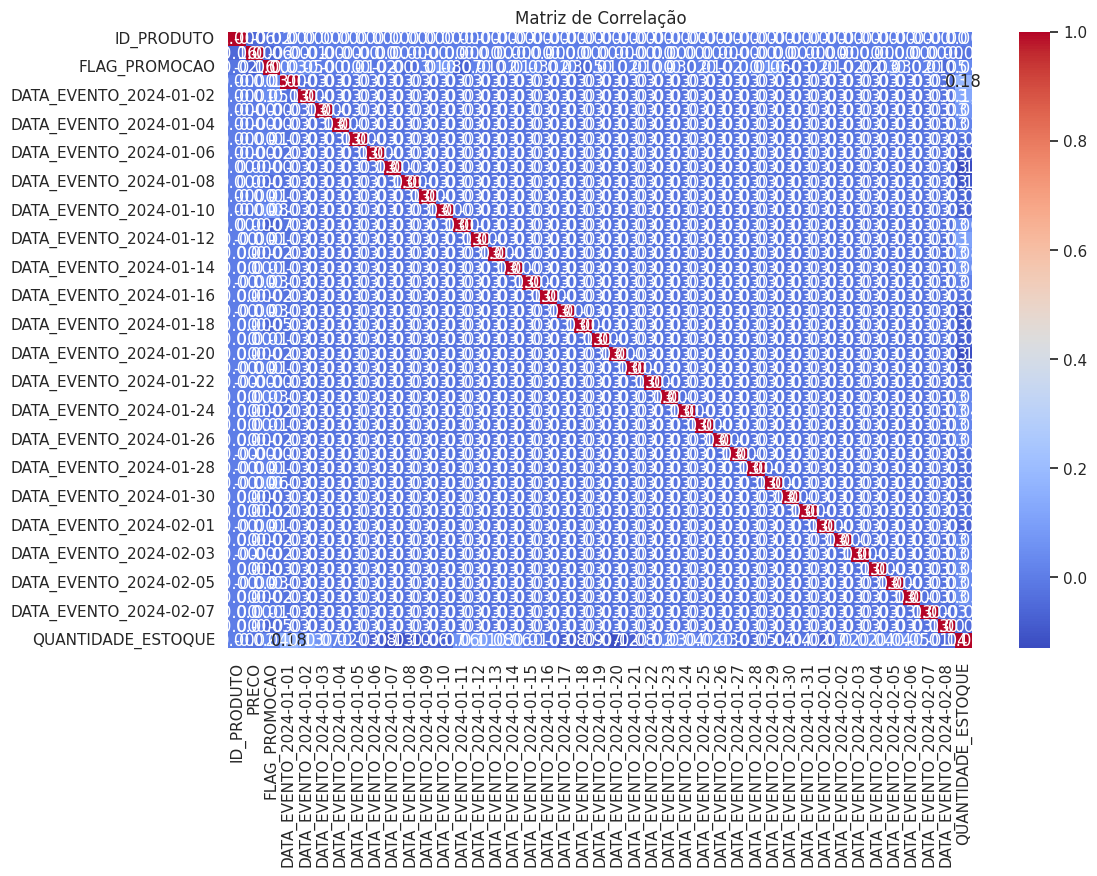

Correlação da variável alvo com as features:
QUANTIDADE_ESTOQUE        1.000000
DATA_EVENTO_2024-01-01    0.182660
DATA_EVENTO_2024-01-02    0.127348
DATA_EVENTO_2024-01-12    0.109749
DATA_EVENTO_2024-01-13    0.082722
DATA_EVENTO_2024-01-03    0.072246
DATA_EVENTO_2024-01-14    0.061980
DATA_EVENTO_2024-01-11    0.059465
DATA_EVENTO_2024-02-06    0.052132
DATA_EVENTO_2024-02-04    0.044380
DATA_EVENTO_2024-02-05    0.043333
DATA_EVENTO_2024-01-24    0.040190
FLAG_PROMOCAO             0.036739
DATA_EVENTO_2024-01-23    0.026362
DATA_EVENTO_2024-01-26    0.025943
DATA_EVENTO_2024-01-25    0.023638
DATA_EVENTO_2024-02-02    0.019658
DATA_EVENTO_2024-02-03    0.017982
DATA_EVENTO_2024-01-04    0.017772
DATA_EVENTO_2024-01-15    0.012115
ID_PRODUTO                0.003166
DATA_EVENTO_2024-02-07   -0.005065
DATA_EVENTO_2024-01-22   -0.019941
DATA_EVENTO_2024-01-31   -0.020360
PRECO                    -0.021219
DATA_EVENTO_2024-01-16   -0.027693
DATA_EVENTO_2024-01-27   -0.029788
DATA_EVENT

In [ ]:
# Concatenar X e y para análise
df_corr = pd.concat([X, y], axis=1)

# Matriz de correlação
corr_matrix = df_corr.corr()

# Heatmap da correlação
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Correlacionamento da variável alvo com features
target_corr = corr_matrix[target].sort_values(ascending=False)
print("Correlação da variável alvo com as features:")
print(target_corr)


In [ ]:
from sklearn.model_selection import train_test_split

# 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (800, 42)
Tamanho do conjunto de teste: (200, 42)


In [ ]:

# Preparar datasets LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parâmetros básicos
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',  # Gradiente boosting clássico
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5
}

# Treinar modelo com early stopping
model = lgb.train(
    params,
    train_data,
    num_boost_round=500,
    valid_sets=[valid_data],
    callbacks=[lgb.early_stopping(stopping_rounds=30)]
)

print("Modelo treinado com sucesso!")

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[4]	valid_0's rmse: 30.9681
Modelo treinado com sucesso!


In [ ]:

# Preparar datasets LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parâmetros básicos
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',  # Gradiente boosting clássico
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5
}

# Treinar modelo com early stopping
model = lgb.train(
    params,
    train_data,
    num_boost_round=500,
    valid_sets=[valid_data],
    callbacks=[lgb.early_stopping(stopping_rounds=30)]
)

print("Modelo treinado com sucesso!")

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[4]	valid_0's rmse: 30.9681
Modelo treinado com sucesso!


In [ ]:
predictions = pd.DataFrame({'real': y_test, 'previsto': y_pred})
predictions.to_csv('/content/previsoes.csv', index=False)

from google.colab import files
files.download('/content/previsoes.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

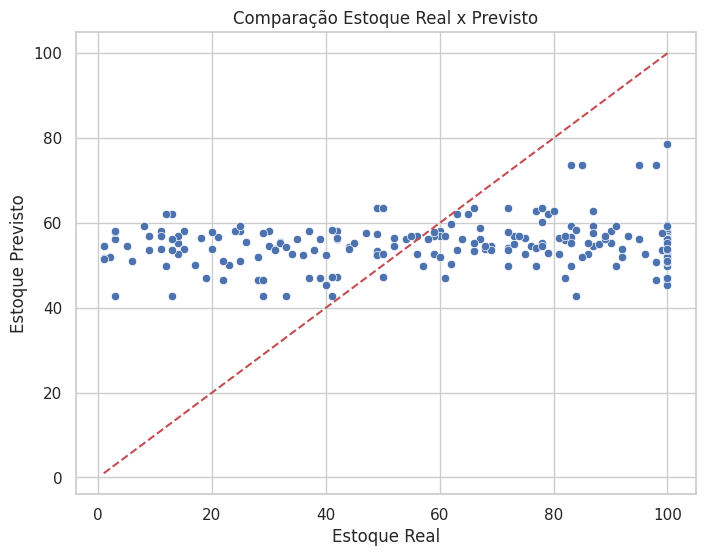

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha perfeita
plt.xlabel('Estoque Real')
plt.ylabel('Estoque Previsto')
plt.title('Comparação Estoque Real x Previsto')
plt.show()


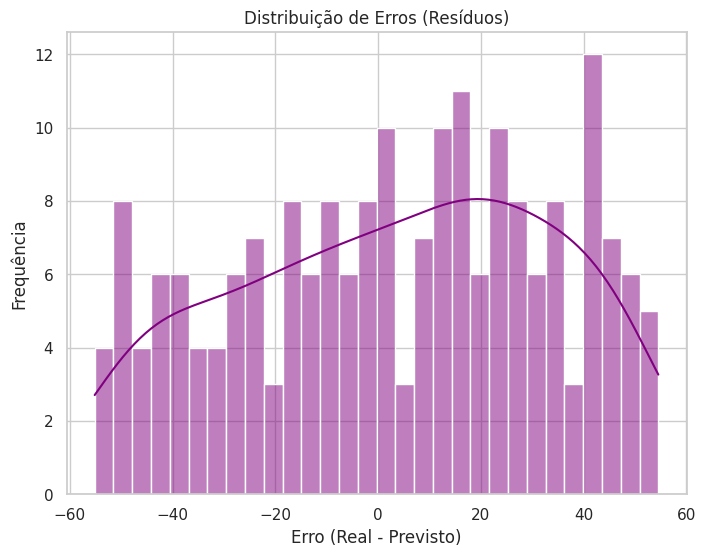

Erro médio: 3.16
Desvio padrão do erro: 30.33


In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Distribuição de Erros (Resíduos)')
plt.xlabel('Erro (Real - Previsto)')
plt.ylabel('Frequência')
plt.show()

print(f"Erro médio: {residuals.mean():.2f}")
print(f"Desvio padrão do erro: {residuals.std():.2f}")


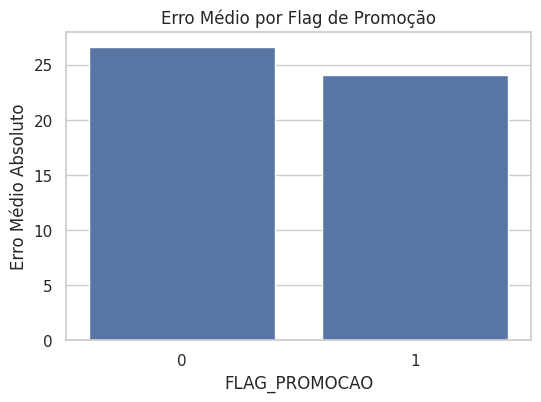

In [ ]:
# Criar coluna de erro absoluto
df_test = X_test.copy()
df_test['real'] = y_test
df_test['previsto'] = y_pred
df_test['erro_absoluto'] = abs(df_test['real'] - df_test['previsto'])

# Agrupar por flag de promoção
erro_por_flag = df_test.groupby('FLAG_PROMOCAO')['erro_absoluto'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='FLAG_PROMOCAO', y='erro_absoluto', data=erro_por_flag)
plt.title('Erro Médio por Flag de Promoção')
plt.ylabel('Erro Médio Absoluto')
plt.show()


/tmp/ipython-input-2254835077.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  erro_por_faixa = df_test.groupby('faixa_preco')['erro_absoluto'].mean().reset_index()


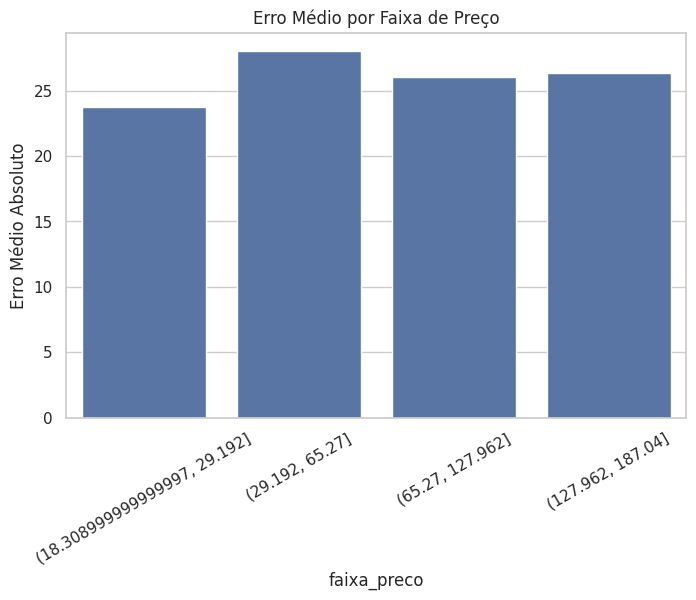

In [ ]:
# Criar faixas de preço
df_test['faixa_preco'] = pd.qcut(df_test['PRECO'], q=4)

erro_por_faixa = df_test.groupby('faixa_preco')['erro_absoluto'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='faixa_preco', y='erro_absoluto', data=erro_por_faixa)
plt.title('Erro Médio por Faixa de Preço')
plt.ylabel('Erro Médio Absoluto')
plt.xticks(rotation=30)
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R²
r2 = r2_score(y_test, y_pred)

# Erro médio absoluto
mae = mean_absolute_error(y_test, y_pred)

print("===== Métricas de Performance =====")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
print(f"MAE (Erro Absoluto Médio): {mae:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")


===== Métricas de Performance =====
RMSE (Raiz do Erro Quadrático Médio): 30.41
MAE (Erro Absoluto Médio): 26.08
R² (Coeficiente de Determinação): 0.03


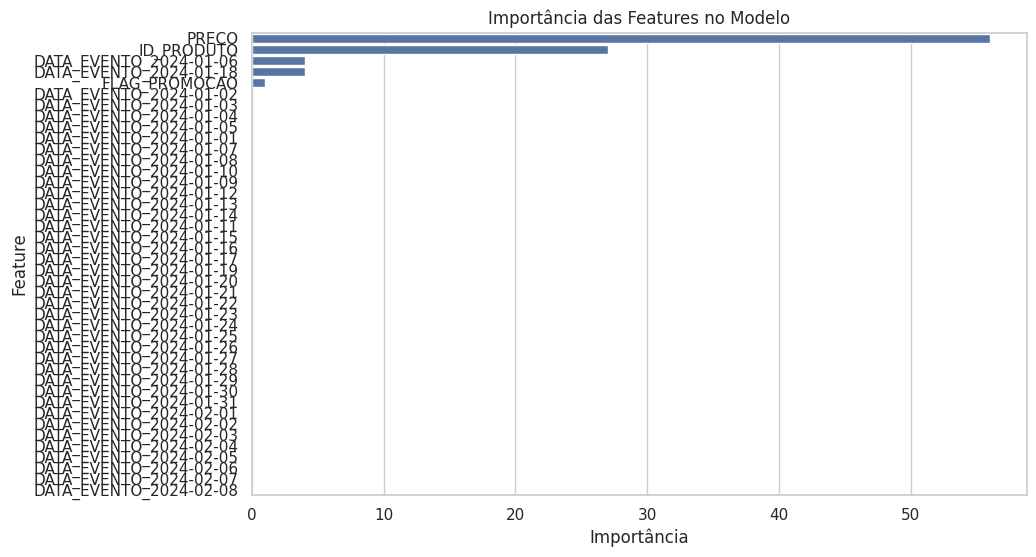

In [ ]:
# Obter importância das features
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importance()
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importância das Features no Modelo')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()


In [ ]:
top_features = feature_importance.head(5)
print("===== Top 5 Features =====")
print(top_features)


===== Top 5 Features =====
                   feature  importance
1                    PRECO          56
0               ID_PRODUTO          27
8   DATA_EVENTO_2024-01-06           4
20  DATA_EVENTO_2024-01-18           4
2            FLAG_PROMOCAO           1


In [ ]:
# Salvar previsões
predictions = pd.DataFrame({
    'real': y_test,
    'previsto': y_pred
})
predictions.to_csv('/content/previsoes.csv', index=False)

# Salvar importância das features
feature_importance.to_csv('/content/feature_importance.csv', index=False)

# Baixar arquivos para o computador
files.download('/content/previsoes.csv')
files.download('/content/feature_importance.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>